In [1]:
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 90
import matplotlib.pyplot as plt
import numpy as np
from scipy import special

mu = 3.
sig = 2.

def Gauss(x):
    return np.exp(-(x - mu)**2 / (2. * sig)**2) / np.sqrt(2. * np.pi * sig**2)

def ExactGaussInt(x):
    return 0.5 * (1. + special.erf((x - mu) / (np.sqrt(2.) * sig)))

def trapezoidal(f, a, b, n):
    h = (b - a) / n
    x = a
    result = f(a)
    for i in range(1, n):
        x = x + h
        result += 2 * f(x)
    return h * 0.5 * (result + f(b))

def Romberg(f, a, b, tol):
    maxSize = 50
    R = np.zeros((maxSize, maxSize))
    bestRs = []
    i = 0
    error = 1.
    while (error > tol) & (i < maxSize): 
        R[i, 0] = trapezoidal(f, a, b, 2**i)
        for m in np.arange(0, i):
            R[i, m + 1] = R[i, m] + (R[i, m] - R[i - 1, m]) / (4.**(m + 1) - 1.)
        bestRs.append(R[i, i]) # We really only ever care about the values 
                               # at the ends of the rows
        if i > 0:
            error = np.fabs(bestRs[-1] - bestRs[-2])
        i += 1
    return bestRs[-1]
        
    

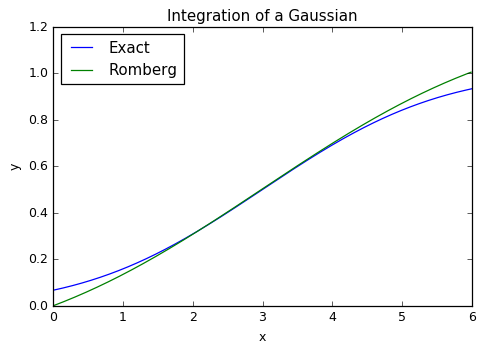

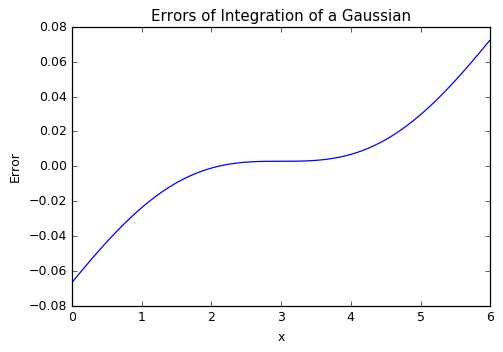

In [4]:
def main():
    
    RombergInts = []
    
    for x in np.arange(0.0, 6.0, 0.01):
        RombergInts.append(Romberg(Gauss, 0., x, 1e-10))
    
    xRange = np.arange(0.0, 6.0, .01)
    xRange2 = np.linspace(0., 6., 1000)
    
    Errors = RombergInts - ExactGaussInt(xRange)
    
    plt.figure(0)
    plt.plot(xRange2, ExactGaussInt(xRange2), label = 'Exact')
    plt.plot(xRange, RombergInts, label = 'Romberg')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc = 0)
    plt.title('Integration of a Gaussian')
    
    plt.figure(1)
    plt.plot(xRange, Errors)
    plt.xlabel('x')
    plt.ylabel('Error')
    plt.title('Errors of Integration of a Gaussian')
    
if __name__ == '__main__':
    main()

At the extremes, this error does not at all agree with the specified $\epsilon$, being about $10^{8}$ times bigger. In the middle of the range, however, we do seem to be within the specified $\epsilon$.